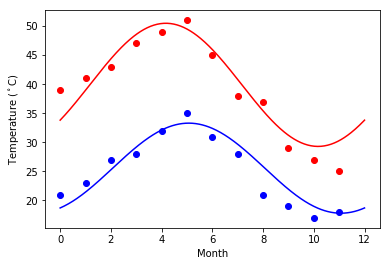

In [26]:
#We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically, the dataset given below.
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as scp

#Input Parameters
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

#Create a range of months
months = np.arange(12) #Return evenly spaced values within a given interval.

#Create days
days = np.linspace(0, 12, num=365) #Return evenly spaced numbers over a specified interval.

#Define a Mapping function to use in curvefit
#x = Day, a = Mean, b = Amplitude(i.e difference in Mean between days), c = temp adjustment
def yearly_temps(x, a, b, c):
    return (a + b * np.cos((x + c) * 2 * np.pi / x.max()))


#Calling the Curvefit Function
optimal_max_temp,max_covariance = scp.curve_fit(yearly_temps,months,max_temp)
optimal_min_temp,min_covariance = scp.curve_fit(yearly_temps,months,min_temp)

#Assign the Optimal values
#a, b, c = Optimal_max_temp
#a, b, c = Optimal_min_temp

#Plotting the Months
plt.plot(months,max_temp,'ro')
plt.plot(months,min_temp,'bo')
#Plotting the Days
plt.plot(days, yearly_temps(days, *optimal_max_temp), 'r-')
plt.plot(days, yearly_temps(days, *optimal_min_temp), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

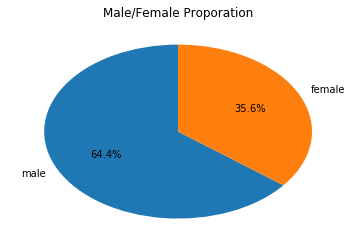

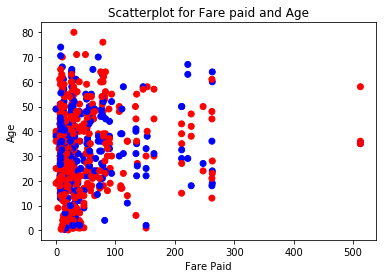

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

input_url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(input_url)

#Create a pie chart presenting the male/female proportion
cnts = titanic.sex.value_counts()
gender = np.array(cnts.index)
vals = np.array(cnts.values)

plt.pie(vals,labels=gender, autopct='%.1f%%',startangle=90)
plt.title('Male/Female Proporation')
plt.show()

#Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
fare_paid = titanic['fare']
age = titanic['age']
gender = titanic['sex']
colors = {'male':'red','female':'blue'}

plt.scatter(fare_paid,age,c=gender.iloc[:-1].apply(lambda x:colors[x]))
plt.xlabel('Fare Paid')
plt.ylabel('Age')
plt.title('Scatterplot for Fare paid and Age')
plt.show()